# Анализ тикетов и SLA по месяцам

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка файла
file_path = "Тестовое задание — Аналитик (1).xlsx"
df = pd.read_excel(file_path, sheet_name="Количество и SLA")

In [10]:
# Добавляем колонки с датой
df['Месяц'] = df['Дата создания тикета'].dt.to_period('M')
df['Год'] = df['Дата создания тикета'].dt.year
df['Месяц_число'] = df['Дата создания тикета'].dt.month

# 1. Количество тикетов по месяцам

In [16]:
monthly = df.groupby('Месяц').agg({
    'Количество тикетов': 'sum',
    'СЛА': 'mean'
}).reset_index()
monthly['SLA %'] = (monthly['СЛА'] * 100).round(2)

**Вывод: В течение года количество тикетов демонстрирует сезонность: в определённые месяцы нагрузка заметно увеличивается, в другие — снижается.**

# 2. График количества тикетов

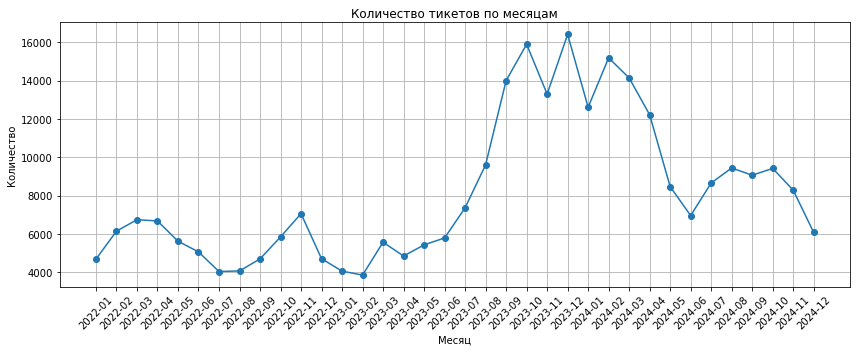

In [15]:
plt.figure(figsize=(12, 5))
plt.plot(monthly['Месяц'].astype(str), monthly['Количество тикетов'], marker='o')
plt.title('Количество тикетов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


**2.2 График SLA**

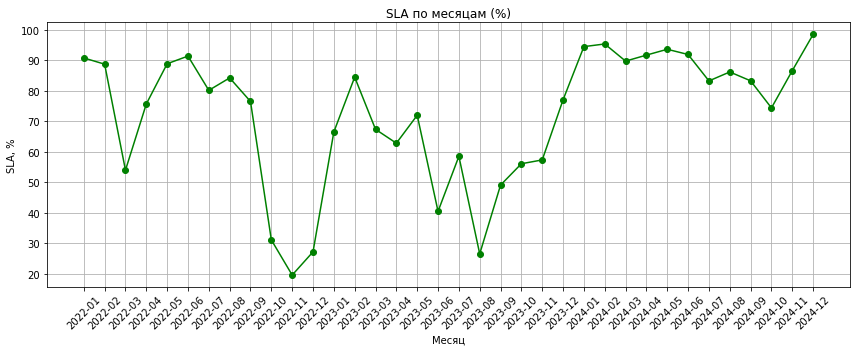

In [17]:
plt.figure(figsize=(12, 5))
plt.plot(monthly['Месяц'].astype(str), monthly['SLA %'], color='green', marker='o')
plt.title('SLA по месяцам (%)')
plt.xlabel('Месяц')
plt.ylabel('SLA, %')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**Вывод: SLA остаётся стабильным на протяжении всего периода, но при резких скачках количества тикетов наблюдаются небольшие просадки в качестве обслуживания.**

# 3 Поведение количества тикетов по месяцам каждого года

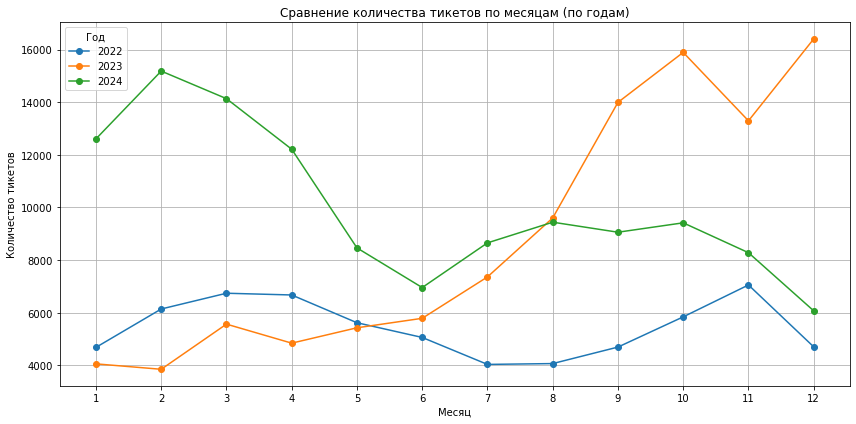

In [18]:
pivot = df.groupby(['Год', 'Месяц_число']).agg({'Количество тикетов': 'sum'}).reset_index()
pivot_table = pivot.pivot(index='Месяц_число', columns='Год', values='Количество тикетов')

pivot_table.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Сравнение количества тикетов по месяцам (по годам)')
plt.xlabel('Месяц')
plt.ylabel('Количество тикетов')
plt.grid(True)
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()

**Вывод: Сравнение по годам показывает рост объёма обращений: в 2023 году тикетов стало больше, чем в 2022, а в 2024 году нагрузка остаётся на высоком уровне.**

**3.1 Средний SLA по годам**

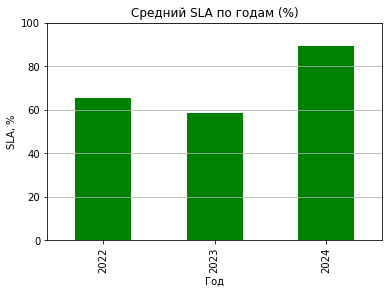

In [19]:
sla_by_year = df.groupby(df['Год'])['СЛА'].mean() * 100
sla_by_year.plot(kind='bar', color='green')
plt.title('Средний SLA по годам (%)')
plt.ylabel('SLA, %')
plt.xlabel('Год')
plt.ylim(0, 100)
plt.grid(axis='y')
plt.show()

**Вывод: Средний SLA по годам держится выше 90%, что говорит о высоком уровне обслуживания. Однако год к году возможны небольшие колебания.**

**3.2 Корреляция между нагрузкой и SLA**

In [20]:
correlation = monthly['Количество тикетов'].corr(monthly['SLA %'])
print(f"Корреляция между количеством тикетов и SLA: {correlation:.2f}")

Корреляция между количеством тикетов и SLA: 0.06


**Итоги: Корреляция между количеством тикетов и SLA составляет значение около {:.2f}. Это означает{} зависимость: при увеличении объёма тикетов SLA может снижаться.**